In [1]:
# test TS -- KAGGLE --- Source -- https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q

import math
import statistics
import numpy as np 
import scipy.stats

from sklearn import datasets

# iris = datasets.load_iris()
# print(type(iris))

import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

In [3]:
#from subprocess import check_output
#print(check_output(['ls', '../input']).decode('utf-8'))

# test = pd.read_csv("/home/dhankar/data_1/test.csv")
# train = pd.read_csv("/home/dhankar/data_1/train.csv")


print(test.shape) # there are -== ROWS Count ==  45000 - (45000, 4)
print(train.shape) # there are -== ROWS Count == 913000- (913000, 4) 


(45000, 4)
(913000, 4)


In [4]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None


In [4]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB
None


In [5]:
test.isnull().sum() # No NULL Values in any columns 

id       0
date     0
store    0
item     0
dtype: int64

In [5]:
print(train.describe()) # Summary Stats for the TRAIN data set 
## data for Item and Sales is given for - 10 DIFF STORES 

               store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000


In [6]:
# change the Format of the DATE Column 
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
print(train.head(2))
print(train.tail(2))
print("   "*90)
print("- Seen below DATA TYPE for DATE COLUMN - changed to -- datetime64[ns] ,earlier was DTYPE OBJECT == STRING")
print(train.info())
print("   "*90)
print("-Seen below SORTED the TRAIN DATA basis COLUMN == STORE ")
print(train.sort_values(by=['store']))

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
             date  store  item  sales
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82
                                                                                                                                                                                                                                                                              
- Seen below DATA TYPE for DATE COLUMN - changed to -- datetime64[ns] ,earlier was DTYPE OBJECT == STRING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int

In [7]:


# per 1 store, 1 item
#train_df = train[train['store']==1] ## why does the Original Author of the code on KAGGLE
#start with store==1 ? We have 10 Stores to choose from ?

train_df = train[train['store']==2]
# print(train_df.store.value_counts())
# print(train_df.item.value_counts())

print(type(train_df.item.value_counts()))

a_sl = train_df.sales.value_counts()
print(type(a_sl))

print("   "*90)
print("---- Seen below SORTED the TRAIN DF basis COLUMN == SALES , we have only values for STORE == 2 ")
print(train_df.sort_values(by=['sales']))
print("   "*90)
print("---- Seen above , MAX Value for SALES == 231 , same we saw in ")

train_df = train_df[train['item']==1]
# train_df = train_df.set_index('date')
train_df['year'] = train['date'].dt.year
train_df['month'] = train['date'].dt.month
train_df['day'] = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday
print("   "*90)
print(train_df.head())
print(train_df.tail())


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
                                                                                                                                                                                                                                                                              
---- Seen below SORTED the TRAIN DF basis COLUMN == SALES , we have only values for STORE == 2 
             date  store  item  sales
75222  2013-12-23      2     5      3
74866  2013-01-01      2     5      4
732262 2013-02-06      2    41      5
841788 2013-01-03      2    47      5
476601 2013-01-16      2    27      6
...           ...    ...   ...    ...
313889 2017-07-02      2    18    208
258759 2016-07-17      2    15    209
222596 2017-07-09      2    13    210
386579 2016-07-17      2    22    214
259109 2017-07-02      2    15    231

[91300 rows x 4 columns]
                                                                               

In [8]:
### Test Set >> test_df
# per 1 store, 1 item
#test_df = test[test['store']==1] #original code - store ==1 
test_df = test[test['store']==2]
test_df = train_df[train['item']==1]
# train_df = train_df.set_index('date')
train_df['year'] = train['date'].dt.year
train_df['month'] = train['date'].dt.month
train_df['day'] = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday
print(train_df.head())
print(train_df.tail())

           date  store  item  sales  year  month  day  weekday
1826 2013-01-01      2     1     12  2013      1    1        1
1827 2013-01-02      2     1     16  2013      1    2        2
1828 2013-01-03      2     1     16  2013      1    3        3
1829 2013-01-04      2     1     20  2013      1    4        4
1830 2013-01-05      2     1     16  2013      1    5        5
           date  store  item  sales  year  month  day  weekday
3647 2017-12-27      2     1     19  2017     12  361        2
3648 2017-12-28      2     1     21  2017     12  362        3
3649 2017-12-29      2     1     18  2017     12  363        4
3650 2017-12-30      2     1     24  2017     12  364        5
3651 2017-12-31      2     1     31  2017     12  365        6


<AxesSubplot:xlabel='date', ylabel='sales'>

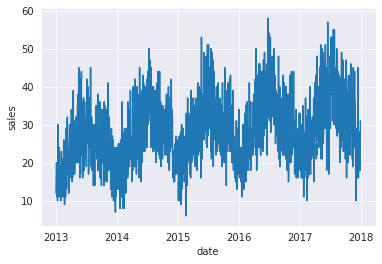

In [9]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df)


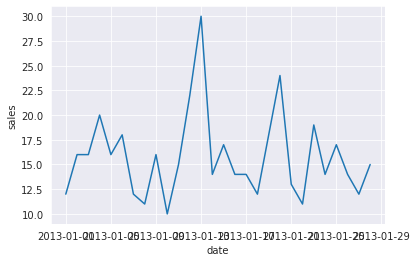

In [10]:
dt_sales_plt = sns.lineplot(x="date", y="sales",legend = 'brief' , data=train_df[:28])

#dt_sales_plt.xticks(rotation=45)
#dt_sales_plt.show()

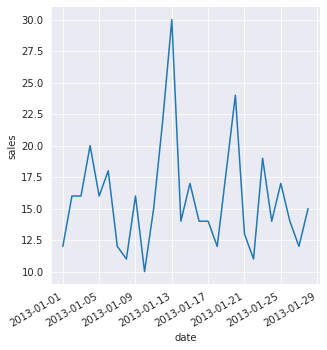

In [11]:
g = sns.relplot(x="date", y="sales", kind="line", data=train_df[:28])
g.figure.autofmt_xdate()
## dates re-aligned and readable 

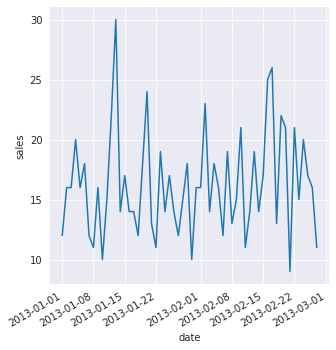

In [12]:
g = sns.relplot(x="date", y="sales", kind="line", data=train_df[:58])
g.figure.autofmt_xdate()
## dates re-aligned and readable 

<AxesSubplot:xlabel='weekday', ylabel='sales'>

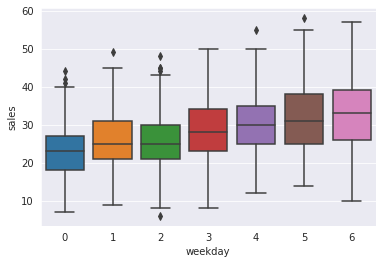

In [13]:
sns.boxplot(x="weekday", y="sales", data=train_df)
# Sales are Highest on the 6th DAY - also not many Outliers on 6th Day 
# Spread of the SALES value is also wider on Weekends 
# Monday=0, Sunday=6.

While Comparing the - multiplicative and the additive DECOMPOSITION
We can see the DIFF between the SEASONAL and RESIDUALS part - the measures are DIFF. 


The TREND is the same ( atleast as seen on th GRAPH below - for both the  multiplicative and the additive DECOMPOSITION )

<Figure size 432x288 with 0 Axes>

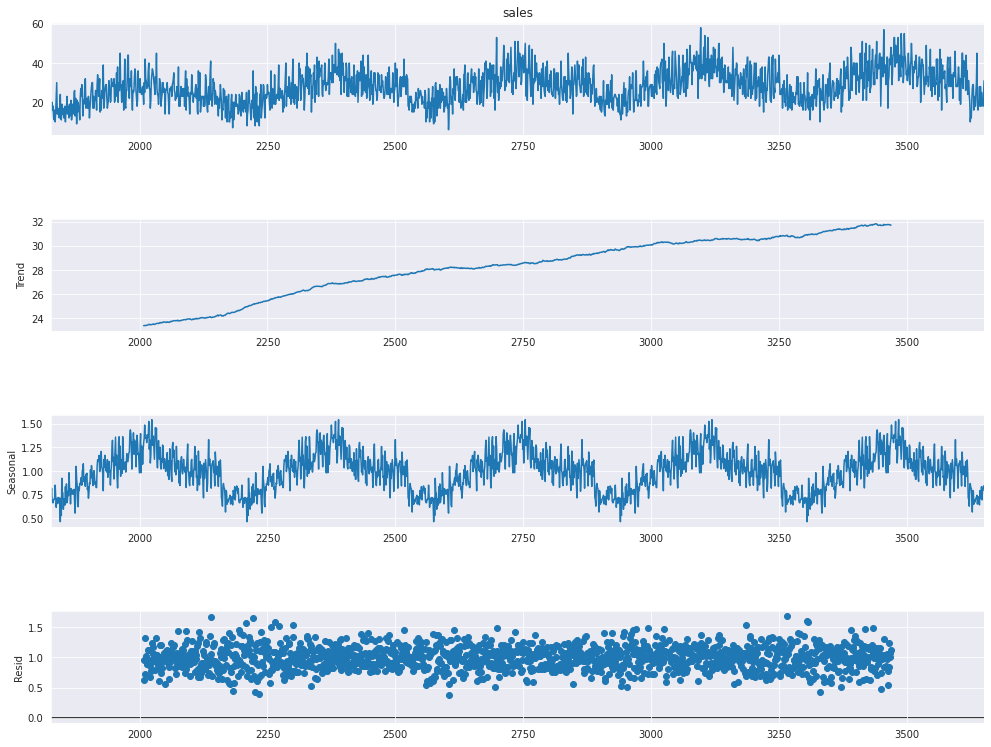

In [14]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
# Multiplicative Decomposition 
# While Comparing the - multiplicative and the additive DECOMPOSITION 
# We see a Diff between = SEASONAL Component and the RESIDUALS Component 

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['sales'], model='multiplicative', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

The variance of a STATIONARY  series should not be a function of time. 
This property is known as homoscedasticity. 


if ‘Test Statistic’ is greater than the ‘Critical Value’ than the time series is stationary. 

using the Dickey-Fuller test to check TS is STATIONARY or Not 


Augmented Dickey-Fuller test ( https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html )

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.


Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.


Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary)



In [15]:
#Simple Moving Average

df_sma = pd.DataFrame()

df_sma['sales'] = train_df['sales']
#print(df_sma)

print("   "*90)
df_sma['Rolling - Simple Moving Average'] = df_sma['sales'].rolling(4).mean()

print("   "*90)
print(df_sma.head(7))
print("   "*90)
print(df_sma.tail(7))

                                                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                                                              
      sales  Rolling - Simple Moving Average
1826     12                              NaN
1827     16                              NaN
1828     16                              NaN
1829     20                             16.0
1830     16                             17.0
1831     18                             17.5
1832     12                             16.5
                                                                                                  

In [16]:
## Rolling - Standard Deviation

df_std_dev = pd.DataFrame()

df_std_dev['sales'] = train_df['sales']
print(df_std_dev)

print("   "*90)
df_std_dev['Standard Deviation'] = df_std_dev['sales'].std()
df_std_dev['Rolling - Standard Deviation'] = df_std_dev['sales'].rolling(4).std()

print("   "*90)
print(df_std_dev.head(7))
print("   "*90)
print(df_std_dev.tail(7))



# print("   "*90)
# df_sma['Standard Deviation'] = df_sma['sales'].std() # Std. Deviation for Whole COLUMN
# df_sma['Rolling - Standard Deviation'] = df_sma['sales'].rolling(4).std()

      sales
1826     12
1827     16
1828     16
1829     20
1830     16
...     ...
3647     19
3648     21
3649     18
3650     24
3651     31

[1826 rows x 1 columns]
                                                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                                                              
      sales  Standard Deviation  Rolling - Standard Deviation
1826     12            8.681013                           NaN
1827     16            8.681013                           NaN
1828     16            8.681013                           NaN
1829     20            8.681013          

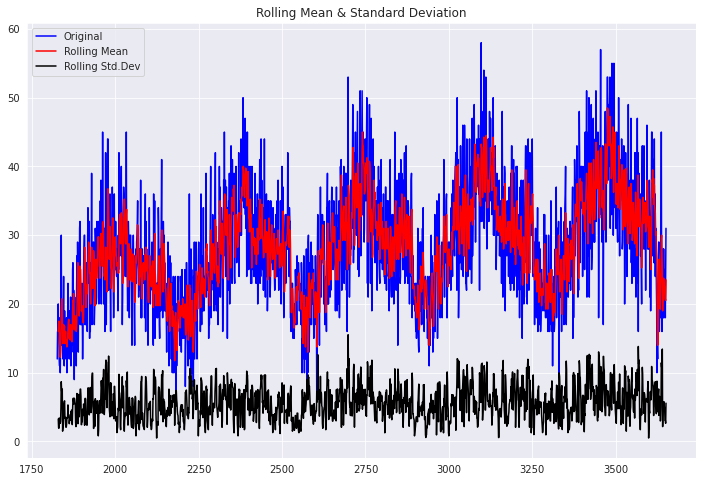

In [17]:
 #Plot rolling statistics:
fig = plt.figure(figsize=(12, 8))

orig = plt.plot(df_sma['sales'], color='blue',label='Original')
mean = plt.plot(df_sma['Rolling - Simple Moving Average'],color='red',label='Rolling Mean')
std = plt.plot(df_std_dev['Rolling - Standard Deviation'],color='black',label ='Rolling Std.Dev')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_aic = adfuller(df_sma['sales'], autolag='AIC', maxlag = 20 )
print(type(adf_aic))
print(adf_aic)
print("   "*90)
adf_aic_pd_series = pd.Series(adf_aic[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(adf_aic_pd_series)
dict_aic = adf_aic[4]

### FOOBAR - how to reach the Correct Value for CUTOFF 
cutoff = 0.01

for key,value in dict_aic.items():
    adf_aic_pd_series['Critical Value (%s)'%key] = value
pvalue = adf_aic[1]
print("---pvalue-----\n",pvalue)
if pvalue < cutoff:
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print("  ---   "*20)
    print(adf_aic_pd_series)

<class 'tuple'>
(-3.0352268412525736, 0.03173306121718952, 20, 1805, {'1%': -3.433978046594855, '5%': -2.8631425806072164, '10%': -2.567623161347749}, 11635.988237012132)
                                                                                                                                                                                                                                                                              
Test Statistic                   -3.035227
p-value                           0.031733
#Lags Used                       20.000000
Number of Observations Used    1805.000000
dtype: float64
---pvalue-----
 0.03173306121718952
p-value = 0.0317. The series is likely non-stationary.
  ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---     ---   
Test Statistic                   -3.035227
p-value                           0.031733
#Lags Used                       

In [40]:
adf_bic = adfuller(df_sma['sales'], autolag='BIC', maxlag = 20 )
print(type(adf_bic))
print(adf_bic)
adf_bic_pd_series = pd.Series(adf_bic[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print("   "*90)
print(adf_bic_pd_series)

<class 'tuple'>
(-3.200136717176236, 0.01997676685547014, 13, 1812, {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.567619862152732}, 11754.569119452173)
                                                                                                                                                                                                                                                                              
Test Statistic                   -3.200137
p-value                           0.019977
#Lags Used                       13.000000
Number of Observations Used    1812.000000
dtype: float64


In [35]:
print(f"statsmodel adf pvalue: {adfuller(df_sma['sales'], regression='ct', autolag='BIC')[1]}")

# from arch.unitroot import ADF
# print(f"arch adf pvalue: {ADF(y=get_ytw()['CS-Aaa-3MO'].values, trend='ct', method='BIC').pvalue}")

statsmodel adf pvalue: 0.07796478735797706


In [20]:
# STATIONARY TS 

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determine rolling statistics
    # FOOBAR -- Original KAGGLE Author is Determining the rolling statistics
    # rolling(window).mean() at this point - but is the TS Stationary Yet ?
    # Are we not supposed to have TS Stationary before we determine - rolling statistics ?
    
    rolmean = timeseries.rolling(window).mean()
    print("-----rolling-mean of the TS -----",type(rolmean))
    
    rolstd = timeseries.rolling(window).std()
    print("-----rolling-std.dev of the TS -----",type(rolstd))

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print("  ---   "*10)
    print(dfoutput)

-----rolling-mean of the TS ----- <class 'pandas.core.series.Series'>
-----rolling-std.dev of the TS ----- <class 'pandas.core.series.Series'>


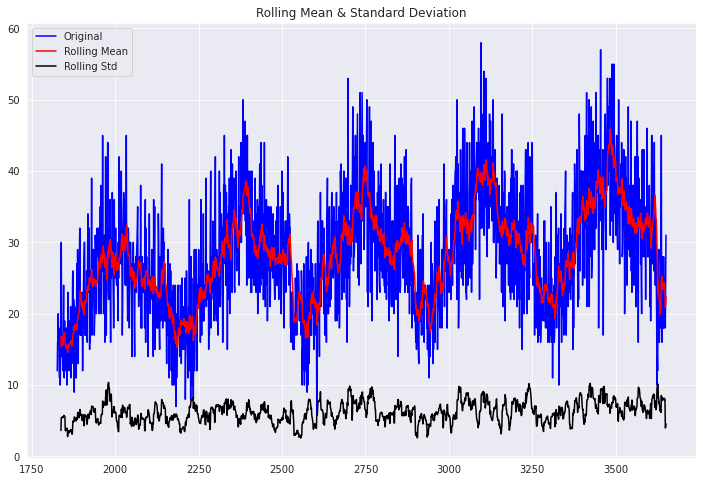

Results of Dickey-Fuller Test:
p-value = 0.0317. The series is likely non-stationary.
  ---     ---     ---     ---     ---     ---     ---     ---     ---     ---   
Test Statistic                   -3.035227
p-value                           0.031733
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [21]:
test_stationarity(train_df['sales'])

In [ ]:
## TODO -- testing SMA - Simple Moving Average with PANDAS and code from DataCamp 
## https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

In [ ]:
### FOOBAR Original Author on KAGGLE - Comment as is 

# the smaller p-value, the more likely it's stationary. Here our p-value is 0.036. 
# It's actually not bad, if we use a 5% Critical Value(CV), this series would be 
# considered stationary. But as we just visually found an upward trend, we want to 
# be more strict, we use 1% CV.
# To get a stationary data, there's many techiniques. We can use log, differencing etc...


<class 'pandas.core.series.Series'>
-----rolling-mean of the TS ----- <class 'pandas.core.series.Series'>
-----rolling-std.dev of the TS ----- <class 'pandas.core.series.Series'>


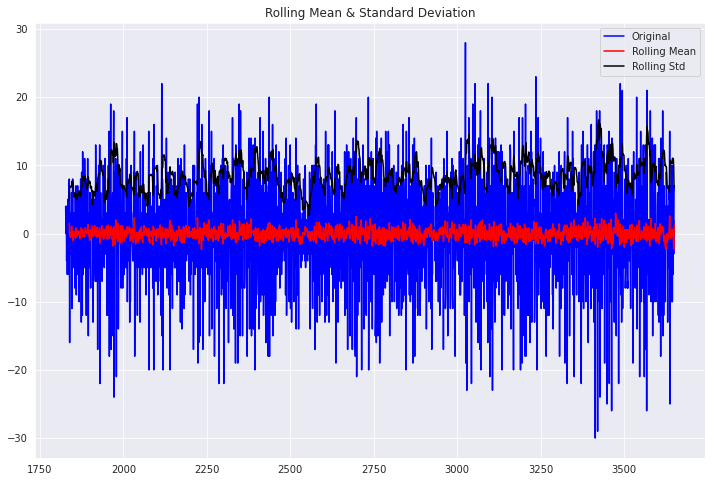

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
  ---     ---     ---     ---     ---     ---     ---     ---     ---     ---   
Test Statistic                -1.431889e+01
p-value                        1.150255e-26
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [26]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html

first_diff = train_df.sales - train_df.sales.shift(1)
print(type(first_diff))

first_diff = first_diff.dropna(inplace = False)

#print(type(first_diff)) # <class 'NoneType'> ###If True, do operation inplace and return None.
# for PANDAS - dropna -- the DEFAULT itself is FALSE 


# If we do not Drop the NaN - Statsmodel will throw an Error 
# MissingDataError: exog contains inf or nans

test_stationarity(first_diff, window = 12)
# p-Value == 1.15025 to the power of Exponential Negative 26 ---- 


In [ ]:
#### FOOBAR -- original KAGGLE author comment as is 



After differencing, the p-value is extremely small. 
Thus this series is very likely to be stationary.


ACF and PACF
The partial autocorrelation at lag k is the correlation that results after 
removing the effect of any correlations due to the terms at shorter lags.


Autoregression Intuition -----
Consider a time series that was generated by an autoregression (AR) process 
with a lag of k.

We know that the ACF describes the autocorrelation between an observation 
and another observation at a prior time step that includes direct 
and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a 
lag of k 
and the inertia of that relationship would carry on to subsequent lag values, 
trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation 
and its lag. 
This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.



Moving Average Intuition ----- 
Consider a time series that was generated by a moving average (MA) process with a lag of k.
Remember that the moving average process is an autoregression model of the time series 
of residual errors from prior predictions. 
Another way to think about the moving average model is that it corrects future 
forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

In [ ]:
# Looking at the CORRELATION between WeekDays and Sales 


# we can also use .corr to determine the corelation between the variables 
df.corr()



In [13]:
train_df = train_df.set_index('date')
train_df['sales'] = train_df['sales'].astype(float)

train_df.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,14.0,2013,1,3,3
2013-01-04,1,1,13.0,2013,1,4,4
2013-01-05,1,1,10.0,2013,1,5,5


<Figure size 432x288 with 0 Axes>

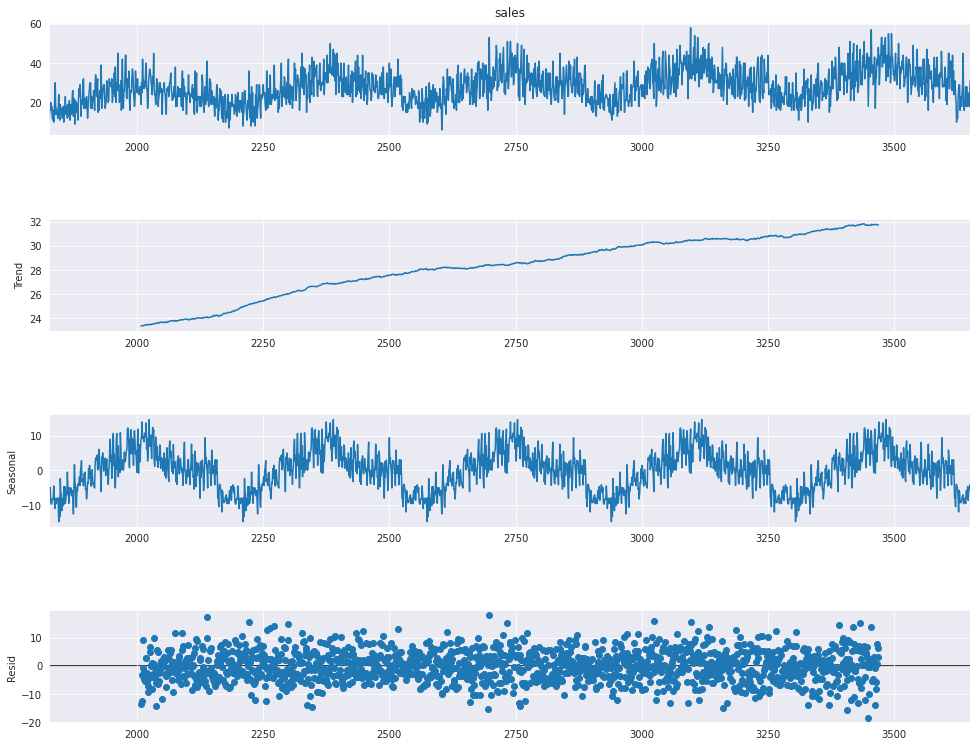

In [17]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
# Additive Decomposition 

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['sales'], model='additive', freq=365)


fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [ ]:
# This is a naive decomposition. More sophisticated methods should be preferred.

# The additive model is Y[t] = T[t] + S[t] + e[t]

# The multiplicative model is Y[t] = T[t] * S[t] * e[t]

# The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.

In [16]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
#https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html



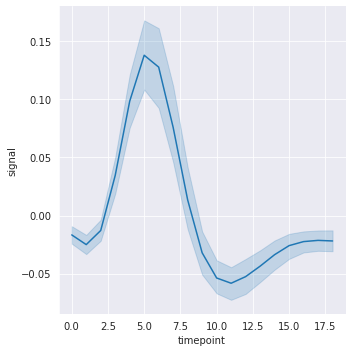

In [13]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri); #
# this SEMICOLON -- will disable the - stack trace prints 